In [1]:
# import libraries

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, confusion_matrix


### Mobile Price Range Prediction 
### A meching learning model classify smartphones into price ranges for Appclick

In [2]:
# load the data 

data = pd.read_csv('train.csv')

In [3]:
#Preview the data 
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# descrictive statistics
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


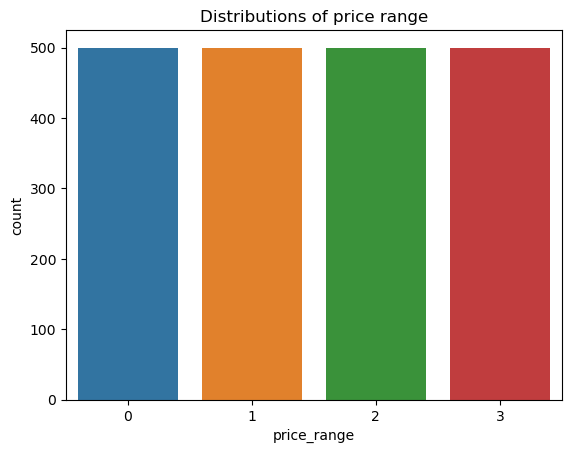

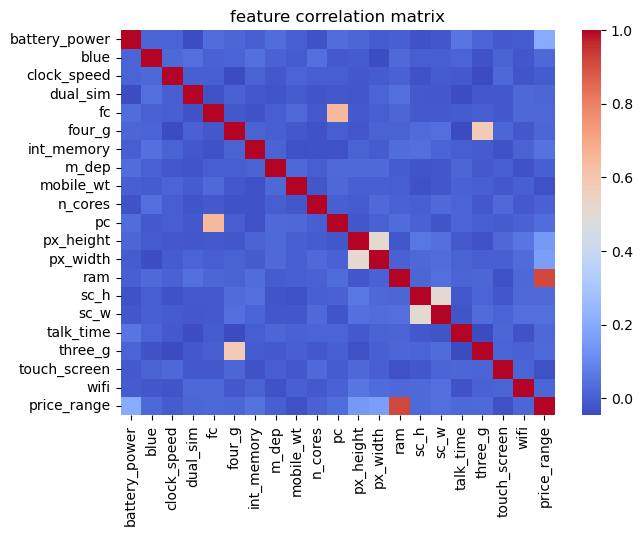

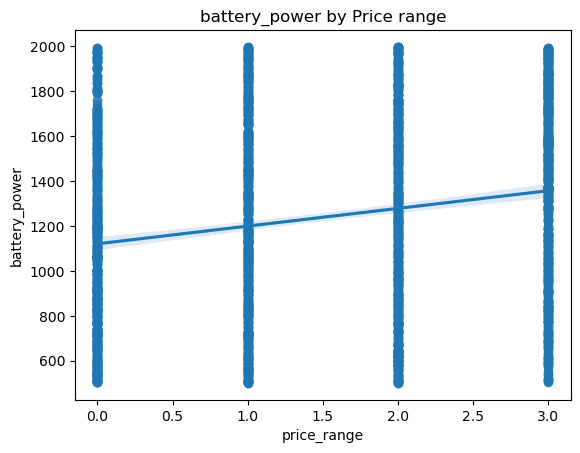

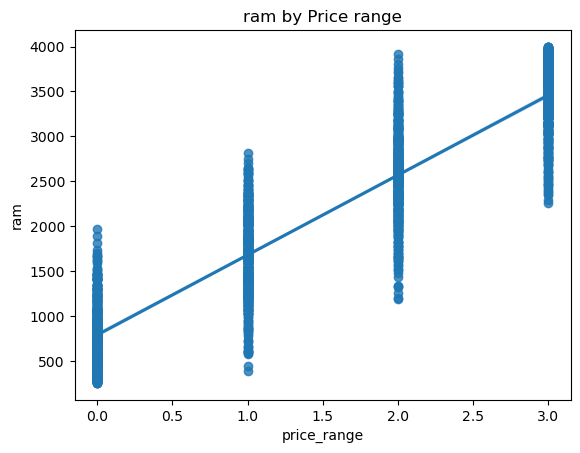

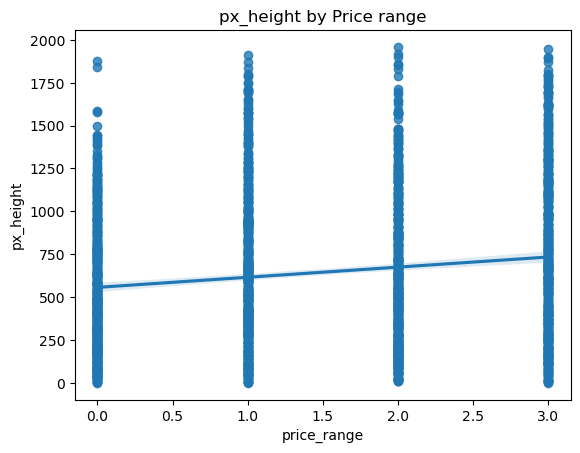

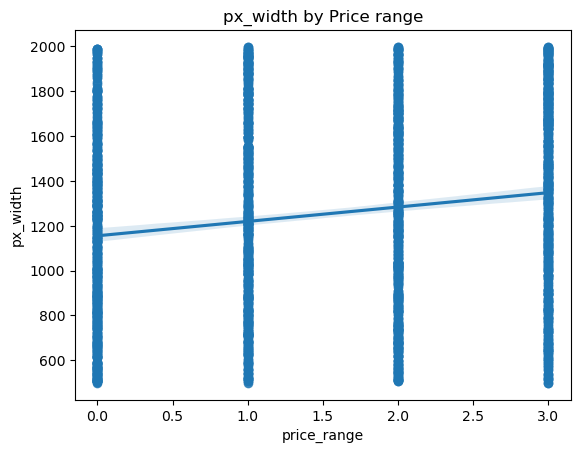

In [5]:
# check target variable distribution 

sns.countplot(x='price_range', data=data)
plt.title('Distributions of price range')
plt.show()


# check correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('feature correlation matrix')
plt.show()

# check for outliers using boxplot for a few important features 
imp_features = ('battery_power', 'ram', 'px_height', 'px_width')
for features in imp_features:
    plt.figure()
    sns.regplot(x="price_range", y=features, data=data)
    plt.title(f'{features} by Price range')
    plt.show() 


In [6]:
# Check for missing value
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
# split the data 
X = data.drop(columns=['price_range'])
y = data['price_range']

In [8]:
# Scale the data 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# train, test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [9]:
# Store model and there names 

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForestClassifier': RandomForestClassifier(random_state=23, max_depth=4),
    'XGBoost': XGBClassifier(n_estimators=2, random_state=23, max_depth=4)
}

# train and evalute each model 
for name, model in models.items():
    print(f'Training: {name}')
    model.fit(X_train, y_train)

    # predict on both train and set
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)



Training: LogisticRegression
Training: RandomForestClassifier
Training: XGBoost


In [10]:
# print f1 score and full classification report

f1 = f1_score(y_test, test_preds, average='macro')
print(f'f1_score (macro): {f1:.4f}')
print(f'Train: {classification_report(y_train, train_preds)}')
print("="*65)
print(f'Test: {classification_report(y_test, test_preds)}')

f1_score (macro): 0.8509
Train:               precision    recall  f1-score   support

           0       0.93      0.95      0.94       403
           1       0.87      0.81      0.84       405
           2       0.80      0.87      0.83       395
           3       0.94      0.91      0.92       397

    accuracy                           0.88      1600
   macro avg       0.88      0.88      0.88      1600
weighted avg       0.89      0.88      0.88      1600

Test:               precision    recall  f1-score   support

           0       0.90      0.97      0.93        97
           1       0.85      0.74      0.79        95
           2       0.78      0.79      0.79       105
           3       0.88      0.91      0.90       103

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



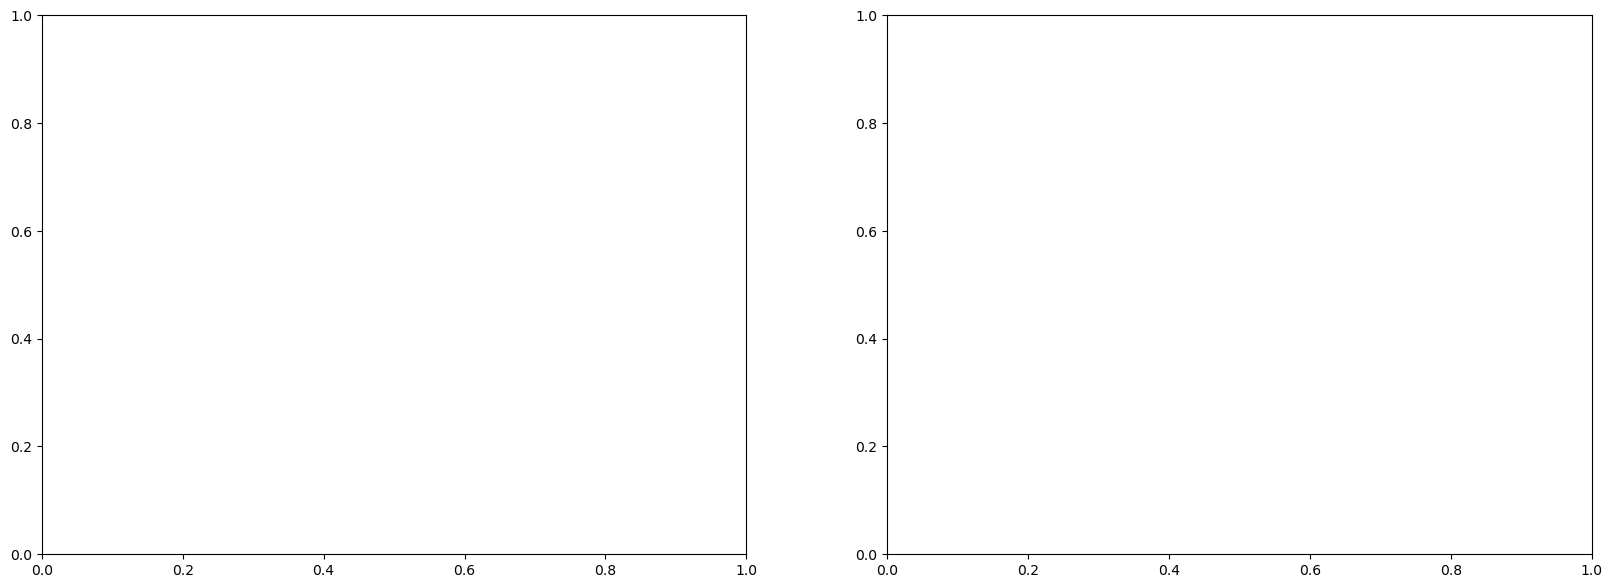

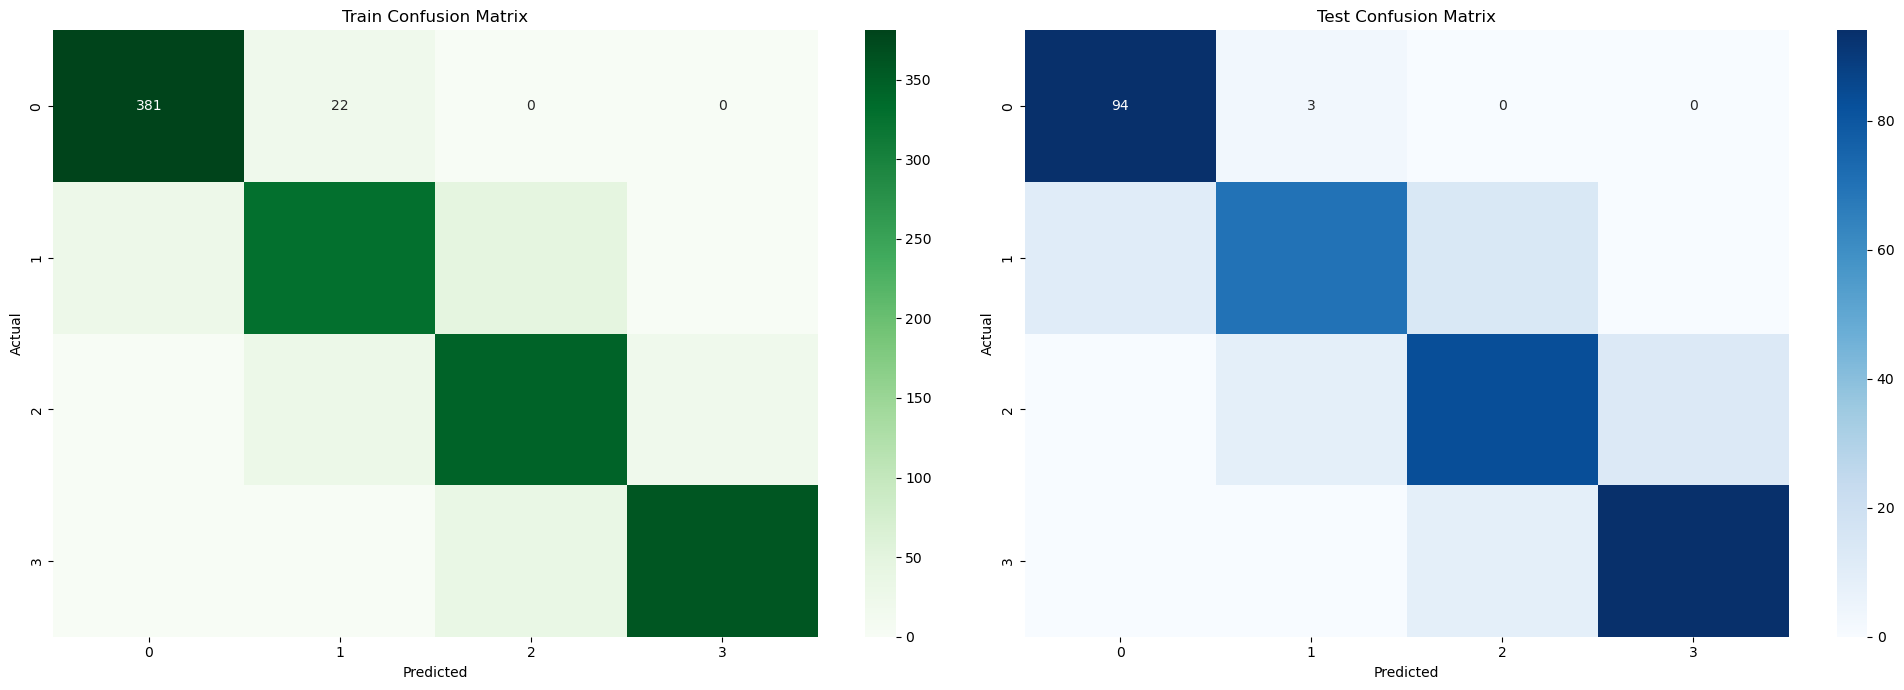

In [11]:
# Confusion matrix
train_confusion = confusion_matrix(y_train, train_preds)
test_confusion = confusion_matrix(y_test, test_preds)
fig, axes = plt.subplots(1,2, figsize = (20, 7))

# plot train and test confusion matrix side by side 
fig, axes = plt.subplots(1,2, figsize = (20, 7))
sns.heatmap(train_confusion, ax=axes[0], annot=True, fmt='d', cmap='Greens', xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
axes[0].set_title("Train Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
sns.heatmap(test_confusion, ax=axes[1], annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
axes[1].set_title("Test Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [12]:
# define Parameter grids 

param_grids = {
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['12'],
        'solver': ['1bfgs']        
    },
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth':[None,10, 20],
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3,5,7],
        'learning_rate': [0.01, 0.1, 1, 10]
    }
}

In [13]:
# run grid search for each model 

best_models = {}

# Logistic Regression Grid
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

lr_model = LogisticRegression(max_iter=1000)
lr_grid = GridSearchCV(lr_model, lr_params, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
lr_grid.fit(X_train, y_train)
best_models["Logistic Regression"] = lr_grid.best_estimator_
print("✅ Logistic Regression Best Params:", lr_grid.best_params_)

# Random Forest Grid
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_models["Random Forest"] = rf_grid.best_estimator_
print("✅ Random Forest Best Params:", rf_grid.best_params_)

# XGBoost Grid
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
xgb_grid.fit(X_train, y_train)
best_models["XGBoost"] = xgb_grid.best_estimator_
print("✅ XGBoost Best Params:", xgb_grid.best_params_)
   
    

Fitting 5 folds for each of 4 candidates, totalling 20 fits
✅ Logistic Regression Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Fitting 5 folds for each of 8 candidates, totalling 40 fits
✅ Random Forest Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [16:00:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [14]:

# evaluate

for name, model in best_models.items():
    print(f" Test Evaluation - {name}")
    test_pred = model.predict(X_test)
    print(f"Test F1 Score (macro): {f1_score(y_test, test_pred, average='macro'):.4f}")
    print("Classification Report:\n", classification_report(y_test, test_pred))


 Test Evaluation - Logistic Regression
Test F1 Score (macro): 0.9666
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        97
           1       0.97      0.92      0.94        95
           2       0.97      0.99      0.98       105
           3       0.99      0.99      0.99       103

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

 Test Evaluation - Random Forest
Test F1 Score (macro): 0.8915
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        97
           1       0.87      0.82      0.84        95
           2       0.85      0.81      0.83       105
           3       0.92      0.95      0.93       103

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weigh

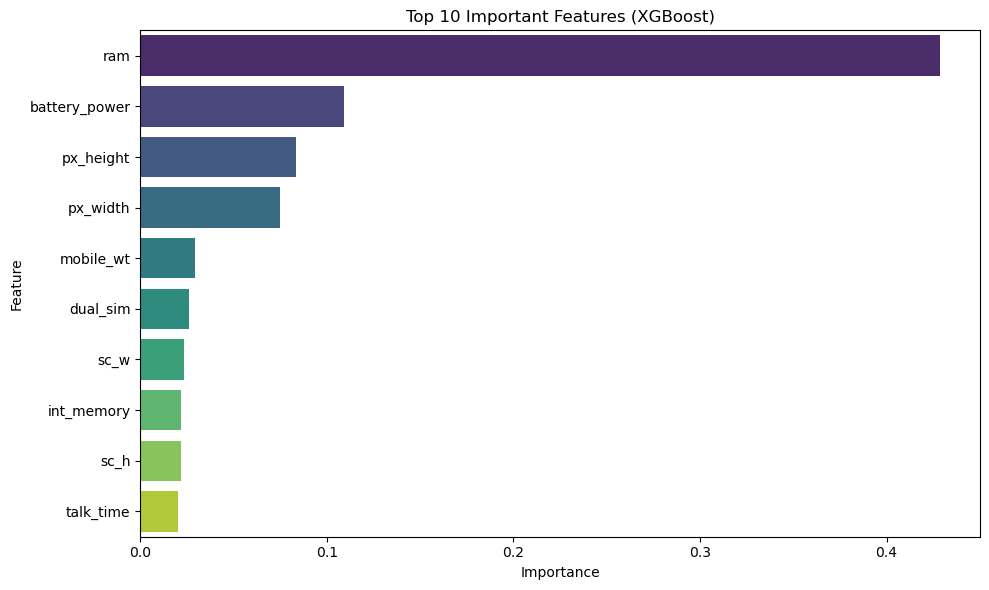

In [15]:

# Get trained XGBoost model
xgb_model = best_models["XGBoost"]

# Feature importances
importances = xgb_model.feature_importances_
feature_names = data.drop("price_range", axis=1).columns

# Create DataFrame
feat_imp_data = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp_data = feat_imp_data.sort_values(by="Importance", ascending=False)

# Plot top 10
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_data.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Important Features (XGBoost)")
plt.tight_layout()
plt.show()


In [16]:
#RAM is the strongest driver of price category, followed by battery power and screen resolution. 
# This suggests that customers perceive value primarily in performance and display quality. 
# Features like front camera resolution and 4G support were less important in determining price,
#  meaning Appclick can consider offering lower-spec versions of those to reduce costs in budget segments